In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [4]:
plt.rc('font', family='Malgun Gothic')

# =============================================

# customer_merge_Category 회귀

In [5]:
# customer_merge_Category 데이터 불러오기

df_customer = pd.read_csv("customer_merge_Category.csv", engine='python', encoding="utf-8")
df_customer.head()

,Unnamed: 0,Unnamed: 0.1,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region,한식,중식,일식,양식,분식,카페
0,0,0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시,22.0,35.0,13.0,13.0,0.0,0.0
2,2,2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도,1.0,1.0,0.0,0.0,1.0,0.0
4,4,4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도,2.0,0.0,2.0,2.0,2.0,0.0


In [6]:
# 'Unnamed: 0', 'Unnamed: 0.1' 열 제거

df_customer = df_customer.drop('Unnamed: 0', axis=1)
df_customer = df_customer.drop('Unnamed: 0.1', axis=1)
df_customer

,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region,한식,중식,일식,양식,분식,카페
0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인,1.0,0.0,0.0,0.0,0.0,0.0
1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시,22.0,35.0,13.0,13.0,0.0,0.0
2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0
3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도,1.0,1.0,0.0,0.0,1.0,0.0
4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도,2.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,zxvnm07,94380,45,남자,전단지광고,모바일,사업자,사업자,0,45-49,충청남도,1.0,0.0,1.0,0.0,0.0,0.0
4913,zxxz60,1341280,32,남자,카카오톡광고,모바일,사업자,사업자,55,30-34,경기도,8.0,8.0,3.0,3.0,3.0,0.0
4914,zzar2000,1534750,40,여자,인터넷검색,모바일,사업자,사업자,207,40-44,경기도,18.0,4.0,2.0,2.0,18.0,0.0
4915,zzbbwmf,1160550,45,남자,기타,모바일,사업자,사업자,196,45-49,부산광역시,3.0,3.0,0.0,0.0,0.0,0.0


In [7]:
pd.options.display.float_format = '{:.2f}'.format

df_customer.describe().round(3)

,상품구매금액,나이,가입-최종주문기간,한식,중식,일식,양식,분식,카페
count,4917.00,4917.00,4917.00,4917.00,4917.00,4917.00,4917.00,4917.00,4917.00
mean,603171.27,39.29,96.51,4.19,3.54,2.45,1.39,3.29,0.27
std,1355672.72,8.55,136.54,8.76,8.42,5.75,3.96,7.75,1.63
min,1320.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,96850.00,32.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,205010.00,40.00,17.00,2.00,1.00,1.00,0.00,1.00,0.00
75%,537560.00,46.00,161.00,4.00,3.00,2.00,1.00,3.00,0.00
max,28514575.00,92.00,786.00,203.00,160.00,97.00,76.00,202.00,49.00


In [8]:
df_customer.columns

Index(['주문자ID', '상품구매금액', '나이', '성별', '유입경로', '유입기기', '사업자구분', '회원구분',
       '가입-최종주문기간', 'AgeGroup', 'region', '한식', '중식', '일식', '양식', '분식', '카페'],
      dtype='object')

In [9]:
# 열 이름 변경

df_customer.rename(columns={'가입-최종주문기간':'가입_최종주문기간'}, inplace=True)

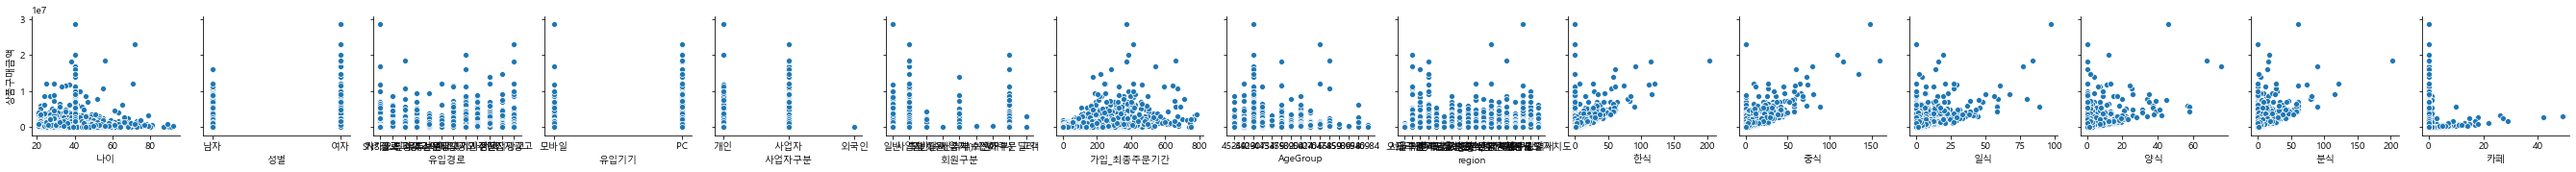

In [10]:
# 변수 간의 경향성 파악 - 그래프 분석

sns.pairplot(df_customer, y_vars="상품구매금액", x_vars=['나이', '성별', '유입경로', '유입기기', '사업자구분', '회원구분',
       '가입_최종주문기간', 'AgeGroup', 'region', '한식', '중식', '일식', '양식', '분식', '카페'])

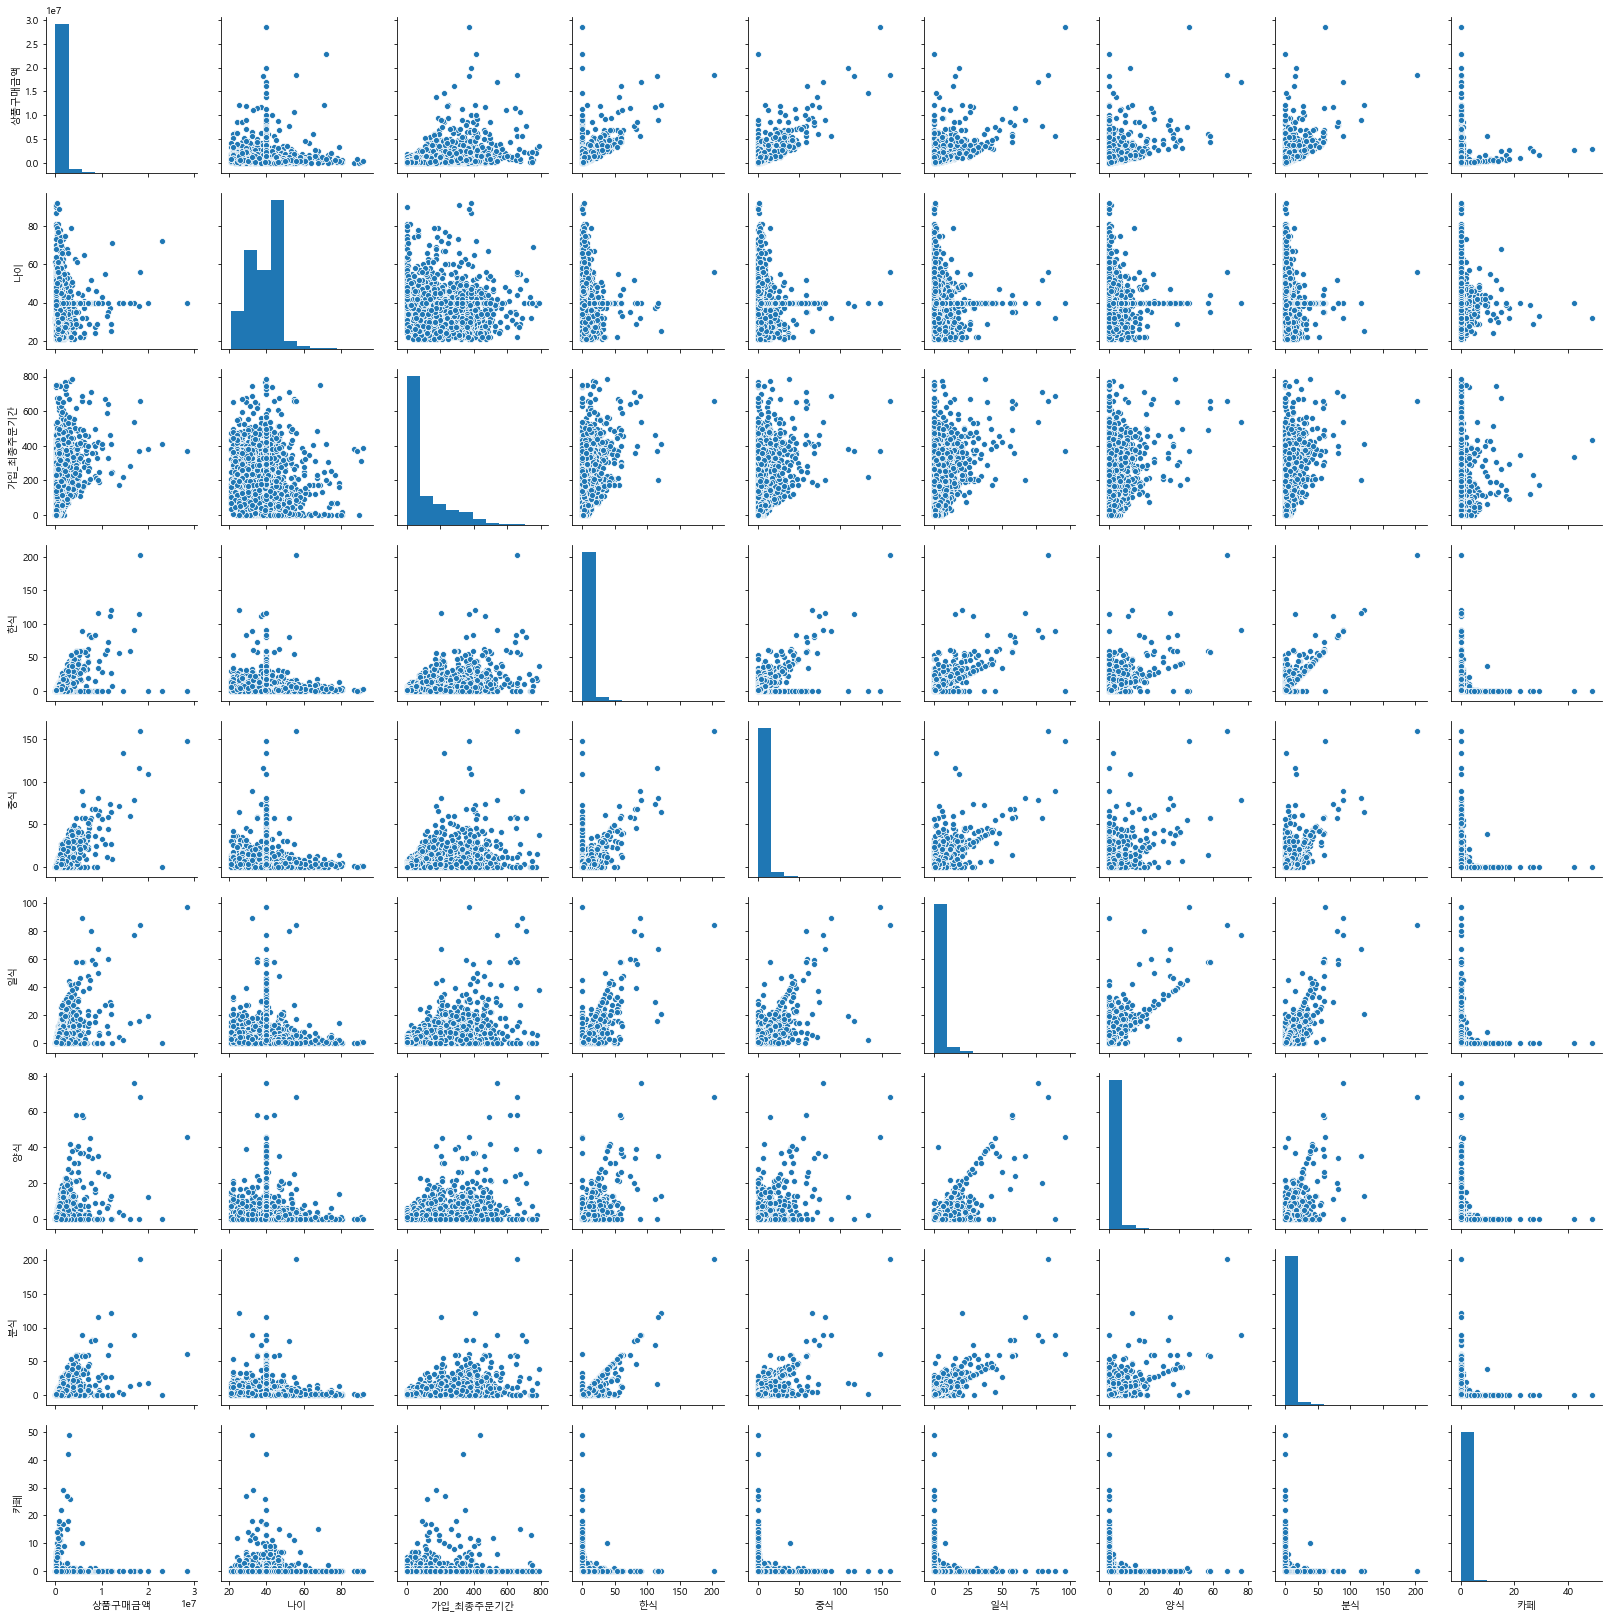

In [11]:
sns.pairplot(df_customer)

In [12]:
df_customer.corr().round(3)

,상품구매금액,나이,가입_최종주문기간,한식,중식,일식,양식,분식,카페
상품구매금액,1.00,-0.03,0.48,0.67,0.82,0.63,0.51,0.62,0.03
나이,-0.03,1.00,-0.18,-0.08,-0.08,-0.06,-0.04,-0.07,0.01
가입_최종주문기간,0.48,-0.18,1.00,0.51,0.44,0.46,0.37,0.47,0.08
한식,0.67,-0.08,0.51,1.00,0.77,0.77,0.62,0.90,-0.06
중식,0.82,-0.08,0.44,0.77,1.00,0.74,0.56,0.77,-0.05
일식,0.63,-0.06,0.46,0.77,0.74,1.00,0.78,0.84,-0.06
양식,0.51,-0.04,0.37,0.62,0.56,0.78,1.00,0.66,-0.05
분식,0.62,-0.07,0.47,0.90,0.77,0.84,0.66,1.00,-0.05
카페,0.03,0.01,0.08,-0.06,-0.05,-0.06,-0.05,-0.05,1.00


In [77]:
df_customer_re_y = df_customer["상품구매금액"]
df_customer_re_x = df_customer.drop("상품구매금액", axis=1, inplace=False)

In [13]:
# 회귀모델 생성

reg_model = smf.ols(formula = """상품구매금액 ~ 나이 + 가입_최종주문기간 + 한식 + 중식 + 일식 + 양식 + 분식 + 카페
                    """, data = df_customer)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 상품구매금액   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1469.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:46:57   Log-Likelihood:                -73398.
No. Observations:                4917   AIC:                         1.468e+05
Df Residuals:                    4908   BIC:                         1.469e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.325e+05   5.21e+04     -6.387      0.0

In [78]:
y_pred1 = reg_result.predict(df_customer_re_x)
print(y_pred1)

0        97830.43
1      5466744.93
2       158802.54
3       171520.64
4        97301.44
          ...    
4912     83625.28
4913   1196655.12
4914    563858.21
4915    786338.58
4916     73041.91
Length: 4917, dtype: float64


In [80]:
print(np.sqrt(MSE(df_customer_re_y, y_pred1)))

735671.3149151168


In [81]:
mae = MAE(df_customer_re_y, y_pred1)
mse = MSE(df_customer_re_y, y_pred1)
print(mae, mse)

296842.45311003074 541212283588.9368


In [62]:
df_customer_x_const

,const,주문자ID,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입_최종주문기간,AgeGroup,region,한식,중식,일식,양식,분식,카페
0,1.00,100304734@n,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인,1.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1003409866@k,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시,22.00,35.00,13.00,13.00,0.00,0.00
2,1.00,100381931@n,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1004498382@k,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도,1.00,1.00,0.00,0.00,1.00,0.00
4,1.00,1004547839@k,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도,2.00,0.00,2.00,2.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,1.00,zxvnm07,45,남자,전단지광고,모바일,사업자,사업자,0,45-49,충청남도,1.00,0.00,1.00,0.00,0.00,0.00
4913,1.00,zxxz60,32,남자,카카오톡광고,모바일,사업자,사업자,55,30-34,경기도,8.00,8.00,3.00,3.00,3.00,0.00
4914,1.00,zzar2000,40,여자,인터넷검색,모바일,사업자,사업자,207,40-44,경기도,18.00,4.00,2.00,2.00,18.00,0.00
4915,1.00,zzbbwmf,45,남자,기타,모바일,사업자,사업자,196,45-49,부산광역시,3.00,3.00,0.00,0.00,0.00,0.00


In [63]:
df_customer_x_const.shape[1]

17

In [64]:
# 다중 공선성 확인

df_customer_x = df_customer.drop("상품구매금액", axis = 1)   # y 제거(열 별로) / x 만 추출
df_customer_x_const = add_constant(df_customer_x)   # x 만 있는 data set

df_customer_vif = pd.DataFrame()
df_customer_vif["variable"] = df_customer_x_const.columns
df_customer_vif["VIF"] = [variance_inflation_factor(df_customer_x_const.values, i) for i in range(df_customer_x_const.shape[1])]
df_customer_vif.sort_values("VIF", inplace = True)
df_customer_vif.round(3)

C:\Users\Jiseon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
...

# =====================================

# customer_merge_Category 의사결정나무

In [16]:
df_customer_tree = df_customer.drop('주문자ID', axis=1)
df_customer_tree = df_customer_tree.drop('region', axis=1)
df_customer_tree

,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입_최종주문기간,AgeGroup,한식,중식,일식,양식,분식,카페
0,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,1.00,0.00,0.00,0.00,0.00,0.00
1,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,22.00,35.00,13.00,13.00,0.00,0.00
2,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,0.00,0.00,0.00,0.00,0.00,0.00
3,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,1.00,1.00,0.00,0.00,1.00,0.00
4,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,2.00,0.00,2.00,2.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,94380,45,남자,전단지광고,모바일,사업자,사업자,0,45-49,1.00,0.00,1.00,0.00,0.00,0.00
4913,1341280,32,남자,카카오톡광고,모바일,사업자,사업자,55,30-34,8.00,8.00,3.00,3.00,3.00,0.00
4914,1534750,40,여자,인터넷검색,모바일,사업자,사업자,207,40-44,18.00,4.00,2.00,2.00,18.00,0.00
4915,1160550,45,남자,기타,모바일,사업자,사업자,196,45-49,3.00,3.00,0.00,0.00,0.00,0.00


In [17]:
# "성별" 여자=0, 남자=1

df_customer_tree.loc[df_customer_tree["성별"]=="여자","성별"] = 0
df_customer_tree.loc[df_customer_tree["성별"]=="남자","성별"] = 1

In [21]:
# X 변수들.. 더미화...

df_customer_tree_dummy = pd.get_dummies(df_customer_tree)
df_customer_tree_dummy.head()

,상품구매금액,나이,성별,가입_최종주문기간,한식,중식,일식,양식,분식,카페,...,AgeGroup_45-49,AgeGroup_50-54,AgeGroup_55-59,AgeGroup_60-64,AgeGroup_65-69,AgeGroup_70-74,AgeGroup_75-79,AgeGroup_80-84,AgeGroup_85-89,AgeGroup_90-94
0,103300,47,1,0,1.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
1,4308520,27,1,141,22.00,35.00,13.00,13.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,71050,41,1,102,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,76400,47,1,0,1.00,1.00,0.00,0.00,1.00,0.00,...,1,0,0,0,0,0,0,0,0,0
4,360800,47,1,0,2.00,0.00,2.00,2.00,2.00,0.00,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# AgeGroup 있어서 "나이" 열 제거해봄

del df_customer_tree_dummy["나이"]

df_customer_tree_dummy

,상품구매금액,성별,가입_최종주문기간,한식,중식,일식,양식,분식,카페,유입경로_SNS광고,...,AgeGroup_45-49,AgeGroup_50-54,AgeGroup_55-59,AgeGroup_60-64,AgeGroup_65-69,AgeGroup_70-74,AgeGroup_75-79,AgeGroup_80-84,AgeGroup_85-89,AgeGroup_90-94
0,103300,1,0,1.00,0.00,0.00,0.00,0.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
1,4308520,1,141,22.00,35.00,13.00,13.00,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,71050,1,102,0.00,0.00,0.00,0.00,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,76400,1,0,1.00,1.00,0.00,0.00,1.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
4,360800,1,0,2.00,0.00,2.00,2.00,2.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,94380,1,0,1.00,0.00,1.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
4913,1341280,1,55,8.00,8.00,3.00,3.00,3.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4914,1534750,0,207,18.00,4.00,2.00,2.00,18.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4915,1160550,1,196,3.00,3.00,0.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df_customer_tree_y = df_customer_tree_dummy["상품구매금액"]
df_customer_tree_x = df_customer_tree_dummy.drop("상품구매금액", axis=1, inplace=False)

In [80]:
df_customer_tree

,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입_최종주문기간,AgeGroup,한식,중식,일식,양식,분식,카페
0,103300,47,1,SNS광고,모바일,개인,일반,0,45-49,1.00,0.00,0.00,0.00,0.00,0.00
1,4308520,27,1,카카오톡광고,모바일,개인,일반,141,25-29,22.00,35.00,13.00,13.00,0.00,0.00
2,71050,41,1,SNS광고,모바일,개인,일반,102,40-44,0.00,0.00,0.00,0.00,0.00,0.00
3,76400,47,1,SNS광고,모바일,개인,일반,0,45-49,1.00,1.00,0.00,0.00,1.00,0.00
4,360800,47,1,블로그광고,PC,개인,일반,0,45-49,2.00,0.00,2.00,2.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,94380,45,1,전단지광고,모바일,사업자,사업자,0,45-49,1.00,0.00,1.00,0.00,0.00,0.00
4913,1341280,32,1,카카오톡광고,모바일,사업자,사업자,55,30-34,8.00,8.00,3.00,3.00,3.00,0.00
4914,1534750,40,0,인터넷검색,모바일,사업자,사업자,207,40-44,18.00,4.00,2.00,2.00,18.00,0.00
4915,1160550,45,1,기타,모바일,사업자,사업자,196,45-49,3.00,3.00,0.00,0.00,0.00,0.00


In [25]:
# train / test  7:3

df_train_tree_x, df_test_tree_x, df_train_tree_y, df_test_tree_y = train_test_split(df_customer_tree_x, df_customer_tree_y, test_size=0.3, random_state=1234)

print("Tree train data X size : {}".format(df_train_tree_x.shape))
print("Tree train data Y size : {}".format(df_train_tree_y.shape))
print("Tree test data X size : {}".format(df_test_tree_x.shape))
print("Tree test data Y size : {}".format(df_test_tree_y.shape))

Tree train data X size : (3441, 49)
Tree train data Y size : (3441,)
Tree test data X size : (1476, 49)
Tree test data Y size : (1476,)


In [26]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_tree_x, df_train_tree_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_tree_x, df_train_tree_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_tree_x,df_test_tree_y)))

Score on training set : 1.000
Score on test set : 0.665


모델 parameter 조정

In [27]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [44]:
train_score = []
test_score = []

para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf : 
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_tree_x, df_train_tree_y)
    train_score.append(tree.score(df_train_tree_x,df_train_tree_y))
    test_score.append(tree.score(df_test_tree_x,df_test_tree_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.00,0.67
1,2,0.90,0.73
2,3,0.83,0.69
3,4,0.81,0.70
4,5,0.79,0.73
5,6,0.78,0.71
6,7,0.76,0.70
7,8,0.75,0.70
8,9,0.75,0.69
9,10,0.74,0.68


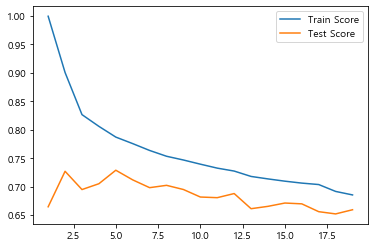

In [29]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label = "Test Score")
plt.legend()

In [31]:
train_score = []
test_score = []

para_split = [n_leaf*2 for n_leaf in range(2,20)]

for v_min_samples_split in para_split : 
    tree = DecisionTreeRegressor(random_state=1234, min_samples_split = v_min_samples_split)
    tree.fit(df_train_tree_x, df_train_tree_y)
    train_score.append(tree.score(df_train_tree_x,df_train_tree_y))
    test_score.append(tree.score(df_test_tree_x,df_test_tree_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.98,0.63
1,6,0.89,0.72
2,8,0.88,0.71
3,10,0.86,0.70
4,12,0.84,0.76
5,14,0.81,0.69
6,16,0.80,0.72
7,18,0.80,0.72
8,20,0.80,0.72
9,22,0.79,0.72


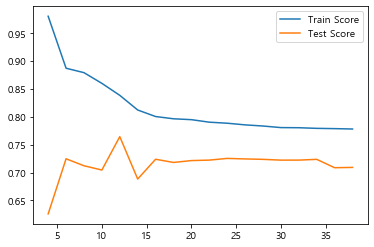

In [32]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "-", label = "Test Score")
plt.legend()

In [33]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_split=12, max_depth = v_max_depth)
    tree.fit(df_train_tree_x, df_train_tree_y)
    train_score.append(tree.score(df_train_tree_x,df_train_tree_y))
    test_score.append(tree.score(df_test_tree_x,df_test_tree_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.39,0.41
1,2,0.60,0.67
2,3,0.67,0.76
3,4,0.73,0.77
4,5,0.76,0.79
5,6,0.77,0.79
6,7,0.79,0.78
7,8,0.80,0.78
8,9,0.82,0.77
9,10,0.83,0.77


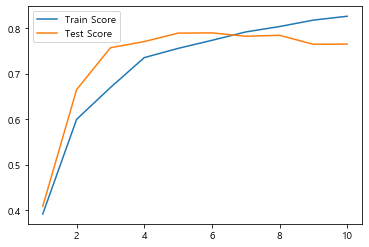

In [34]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "-", label = "Test Score")
plt.legend()

In [35]:
tree_final = DecisionTreeRegressor(min_samples_split=12, max_depth=8, random_state=1234)
tree_final.fit(df_train_tree_x, df_train_tree_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [36]:
ds_final = DecisionTreeRegressor(min_samples_split=12, max_depth=8, random_state=1234)
ds_final.fit(df_train_tree_x, df_train_tree_y)

print("Score on training set: {:.3f}".format(ds_final.score(df_train_tree_x, df_train_tree_y)))
print("Score in test set: {:.3f}".format(ds_final.score(df_test_tree_x, df_test_tree_y)))
ds_final

Score on training set: 0.804
Score in test set: 0.784


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [37]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = ds_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,중식,0.69
2,한식,0.18
44,AgeGroup_70-74,0.06
1,가입_최종주문기간,0.03
4,일식,0.02
10,유입경로_블로그광고,0.01
9,유입경로_기타,0.01
0,성별,0.00
28,회원구분_사업자,0.00
7,카페,0.00


In [52]:
y_pred = tree_final.predict(df_test_tree_x)
print(y_pred)

[185572.04433498 219457.61806982 219457.61806982 ... 434979.16666667
 325352.55244755 325352.55244755]


In [ ]:
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

In [56]:
print(np.sqrt(MSE(df_test_tree_y, y_pred)))

708024.9182997212


In [54]:
mae = MAE(df_test_tree_y, y_pred)
mse = MSE(df_test_tree_y, y_pred)
print(mae, mse)

269738.86628955277 501299284933.3269


# ====================================

# customer_merge_Category 그래디언트

In [58]:
df_customer_gradi_dummy = df_customer_tree_dummy
df_customer_gradi_dummy

,상품구매금액,성별,가입_최종주문기간,한식,중식,일식,양식,분식,카페,유입경로_SNS광고,...,AgeGroup_45-49,AgeGroup_50-54,AgeGroup_55-59,AgeGroup_60-64,AgeGroup_65-69,AgeGroup_70-74,AgeGroup_75-79,AgeGroup_80-84,AgeGroup_85-89,AgeGroup_90-94
0,103300,1,0,1.00,0.00,0.00,0.00,0.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
1,4308520,1,141,22.00,35.00,13.00,13.00,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,71050,1,102,0.00,0.00,0.00,0.00,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,76400,1,0,1.00,1.00,0.00,0.00,1.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
4,360800,1,0,2.00,0.00,2.00,2.00,2.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,94380,1,0,1.00,0.00,1.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
4913,1341280,1,55,8.00,8.00,3.00,3.00,3.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4914,1534750,0,207,18.00,4.00,2.00,2.00,18.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4915,1160550,1,196,3.00,3.00,0.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
df_customer_gradi_dummy_y = df_customer_gradi_dummy["상품구매금액"]
df_customer_gradi_dummy_x = df_customer_gradi_dummy.drop("상품구매금액", axis=1, inplace=False)

In [60]:
df_customer_gradi_train_x, df_customer_gradi_test_x, df_customer_gradi_train_y, df_customer_gradi_test_y = train_test_split(df_customer_gradi_dummy_x, df_customer_gradi_dummy_y, test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_customer_gradi_train_x.shape))
print("train data Y size : {}".format(df_customer_gradi_train_y.shape))
print("test data X size : {}".format(df_customer_gradi_test_x.shape))
print("test data Y size : {}".format(df_customer_gradi_test_y.shape))

train data X size : (3441, 49)
train data Y size : (3441,)
test data X size : (1476, 49)
test data Y size : (1476,)


In [61]:
# 모델 생성

gd_uncustomized = GradientBoostingRegressor(random_state=1234)
gd_uncustomized.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)

print("Score on training set: {:.3f}".format(gd_uncustomized.score(df_customer_gradi_train_x, df_customer_gradi_train_y)))
print("Score on test set: {:.3f}".format(gd_uncustomized.score(df_customer_gradi_test_x, df_customer_gradi_test_y)))

Score on training set: 0.905
Score on test set: 0.774


모델 parameter 조정

In [62]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gd = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gd.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)
    train_score.append(gd.score(df_customer_gradi_train_x, df_customer_gradi_train_y))
    test_score.append(gd.score(df_customer_gradi_test_x, df_customer_gradi_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.64,0.66
1,20,0.76,0.75
2,30,0.83,0.77
3,40,0.85,0.77
4,50,0.87,0.77
5,60,0.88,0.77
6,70,0.89,0.78
7,80,0.89,0.78
8,90,0.90,0.78
9,100,0.91,0.77


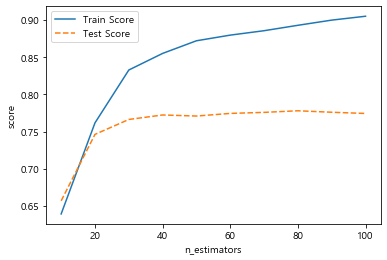

In [63]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [64]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gd = GradientBoostingRegressor(n_estimators=60, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    gd.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)
    train_score.append(gd.score(df_customer_gradi_train_x, df_customer_gradi_train_y))
    test_score.append(gd.score(df_customer_gradi_test_x, df_customer_gradi_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Estimators"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Estimators,TrainScore,TestScore
0,1,0.88,0.77
1,2,0.86,0.77
2,3,0.85,0.73
3,4,0.84,0.75
4,5,0.83,0.75
5,6,0.81,0.74
6,7,0.80,0.74
7,8,0.80,0.73
8,9,0.79,0.73
9,10,0.78,0.74


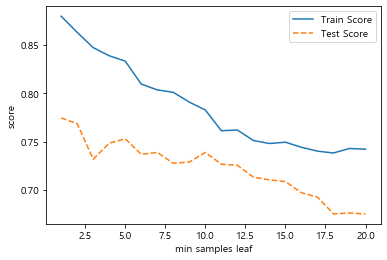

In [65]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [66]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split : 
    gd = GradientBoostingRegressor(random_state=1234, n_estimators=60, min_samples_leaf=7, min_samples_split=v_min_samples_split)
    gd.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)
    train_score.append(gd.score(df_customer_gradi_train_x,df_customer_gradi_train_y))
    test_score.append(gd.score(df_customer_gradi_test_x,df_customer_gradi_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplessplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,2,0.80,0.74
1,4,0.80,0.74
2,6,0.80,0.74
3,8,0.80,0.74
4,10,0.80,0.74
5,12,0.80,0.74
6,14,0.80,0.74
7,16,0.80,0.73
8,18,0.80,0.73
9,20,0.80,0.73


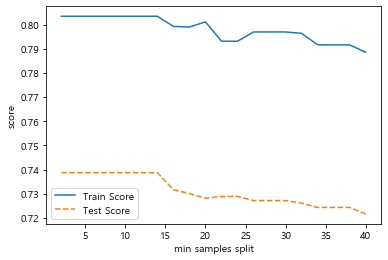

In [67]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [68]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth : 
    gd = GradientBoostingRegressor(random_state=1234, n_estimators=60, min_samples_leaf=7, min_samples_split=16, max_depth = v_max_depth)
    gd.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)
    train_score.append(gd.score(df_customer_gradi_train_x,df_customer_gradi_train_y))
    test_score.append(gd.score(df_customer_gradi_test_x,df_customer_gradi_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.68,0.68
1,2,0.76,0.73
2,3,0.80,0.73
3,4,0.84,0.73
4,5,0.86,0.73
5,6,0.86,0.74
6,7,0.89,0.72
7,8,0.89,0.73
8,9,0.90,0.73
9,10,0.90,0.73


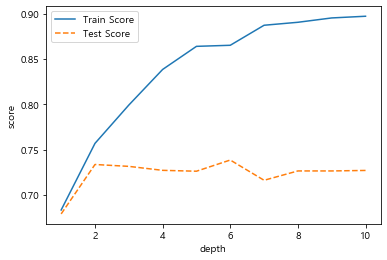

In [69]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

In [70]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr : 
    gd = GradientBoostingRegressor(random_state=1234, n_estimators=60, min_samples_leaf=7, min_samples_split=15, max_depth = 5, learning_rate=v_learning_rate)
    gd.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)
    train_score.append(gd.score(df_customer_gradi_train_x,df_customer_gradi_train_y))
    test_score.append(gd.score(df_customer_gradi_test_x,df_customer_gradi_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.10,0.86,0.74
1,0.20,0.91,0.72
2,0.30,0.93,0.68
3,0.40,0.95,0.66
4,0.50,0.95,0.69
5,0.60,0.97,0.67
6,0.70,0.97,0.64
7,0.80,0.97,0.66
8,0.90,0.98,0.58


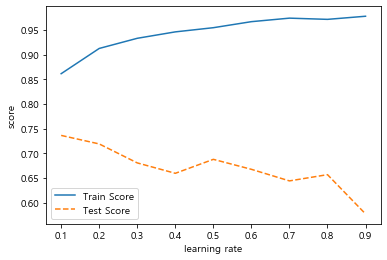

In [71]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [72]:
gd_final = GradientBoostingRegressor(random_state=1234, n_estimators=60, min_samples_leaf=7, min_samples_split=15, max_depth=5, learning_rate = 0.1)
gd_final.fit(df_customer_gradi_train_x, df_customer_gradi_train_y)

print("Score on training set: {:.3f}".format(gd_final.score(df_customer_gradi_train_x, df_customer_gradi_train_y)))
print("Score in test set: {:.3f}".format(gd_final.score(df_customer_gradi_test_x, df_customer_gradi_test_y)))


Score on training set: 0.861
Score in test set: 0.736


In [73]:
v_feature_name = df_customer_gradi_train_x.columns

df_importance_G = pd.DataFrame()
df_importance_G["Feature"] = v_feature_name
df_importance_G["Importance"] = gd_final.feature_importances_
df_importance_G.sort_values("Importance", ascending=False, inplace=True)
df_importance_G.round(3)

,Feature,Importance
3,중식,0.63
2,한식,0.18
1,가입_최종주문기간,0.06
44,AgeGroup_70-74,0.04
0,성별,0.02
6,분식,0.01
7,카페,0.01
5,양식,0.01
4,일식,0.01
38,AgeGroup_40-44,0.00


In [74]:
y_pred2 = tree_final.predict(df_customer_gradi_test_x)
print(y_pred2)

[185572.04433498 219457.61806982 219457.61806982 ... 434979.16666667
 325352.55244755 325352.55244755]


In [ ]:
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

In [75]:
print(np.sqrt(MSE(df_customer_gradi_test_y, y_pred2)))

708024.9182997212


In [76]:
mae = MAE(df_customer_gradi_test_y, y_pred2)
mse = MSE(df_customer_gradi_test_y, y_pred2)
print(mae, mse)

269738.86628955277 501299284933.3269


# ====================================

# customer_merge_Category 랜덤


In [82]:
df_customer_ran_dummy = df_customer_tree_dummy
df_customer_ran_dummy

,상품구매금액,성별,가입_최종주문기간,한식,중식,일식,양식,분식,카페,유입경로_SNS광고,...,AgeGroup_45-49,AgeGroup_50-54,AgeGroup_55-59,AgeGroup_60-64,AgeGroup_65-69,AgeGroup_70-74,AgeGroup_75-79,AgeGroup_80-84,AgeGroup_85-89,AgeGroup_90-94
0,103300,1,0,1.00,0.00,0.00,0.00,0.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
1,4308520,1,141,22.00,35.00,13.00,13.00,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,71050,1,102,0.00,0.00,0.00,0.00,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,76400,1,0,1.00,1.00,0.00,0.00,1.00,0.00,1,...,1,0,0,0,0,0,0,0,0,0
4,360800,1,0,2.00,0.00,2.00,2.00,2.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,94380,1,0,1.00,0.00,1.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0
4913,1341280,1,55,8.00,8.00,3.00,3.00,3.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4914,1534750,0,207,18.00,4.00,2.00,2.00,18.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
4915,1160550,1,196,3.00,3.00,0.00,0.00,0.00,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
df_customer_ran_dummy_y = df_customer_ran_dummy["상품구매금액"]
df_customer_ran_dummy_x = df_customer_ran_dummy.drop("상품구매금액", axis=1, inplace=False)

In [84]:
df_train_ran_x, df_test_ran_x, df_train_ran_y, df_test_ran_y = train_test_split(df_customer_ran_dummy_x, df_customer_ran_dummy_y, test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_ran_x.shape))
print("train data Y size : {}".format(df_train_ran_y.shape))
print("test data X size : {}".format(df_test_ran_x.shape))
print("test data Y size : {}".format(df_test_ran_y.shape))

train data X size : (3441, 49)
train data Y size : (3441,)
test data X size : (1476, 49)
test data Y size : (1476,)


In [86]:
# 모델 생성

rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_ran_x, df_train_ran_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_ran_x, df_train_ran_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_ran_x, df_test_ran_y)))

C:\Users\Jiseon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score on training set: 0.930
Score on test set: 0.773


In [87]:
v_feature_name = df_train_ran_x.columns

In [88]:
df_importance_ran = pd.DataFrame()
df_importance_ran["Feature"] = v_feature_name
df_importance_ran["Importance"] = rf_uncustomized.feature_importances_

df_importance_ran.sort_values("Importance", ascending=False, inplace = True)
df_importance_ran.round(3)

,Feature,Importance
3,중식,0.56
2,한식,0.15
1,가입_최종주문기간,0.06
0,성별,0.05
44,AgeGroup_70-74,0.04
6,분식,0.02
4,일식,0.02
32,회원구분_전화주문 고객,0.01
5,양식,0.01
35,AgeGroup_25-29,0.01


In [89]:
y_pred4 = rf_uncustomized.predict(df_test_ran_x)
print(y_pred4)


def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

print(np.sqrt(MSE(df_test_ran_y, y_pred4)))

mae = MAE(df_test_ran_y, y_pred4)
mse = MSE(df_test_ran_y, y_pred4)
print(mae, mse)

[227559. 256118. 243144. ... 716124. 242639. 260048.]
726989.8561454891
271194.47736187524 528514250938.4391
